# Time Taken to complete a case

---


### _The objective of this analysis is to track the number of unfinished cases throughout the years, and to track the average time taken to complete a case to see if there is any correlation between the two._

---


## Preprocessing:


In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt


In [ ]:
case_years = [
    "./precog_data/csv/cases/cases_2010.csv",
    "./precog_data/csv/cases/cases_2011.csv",
    "./precog_data/csv/cases/cases_2012.csv",
    "./precog_data/csv/cases/cases_2013.csv",
    "./precog_data/csv/cases/cases_2014.csv",
    "./precog_data/csv/cases/cases_2015.csv",
    "./precog_data/csv/cases/cases_2016.csv",
    "./precog_data/csv/cases/cases_2017.csv",
    "./precog_data/csv/cases/cases_2018.csv", ]


---

## Finding the unfinished cases per year:


In [4]:
% % time
total_cases_arr = []
unfinished_cases_arr = []

for case_year in case_years:

    total_cases = 0
    unfinished_cases = 0

    cases_df = pd.read_csv(case_year, iterator=True, chunksize=1000000)
    for case_df in cases_df:

        total_cases += case_df.shape[0]
        unfinished_cases += case_df[~case_df["date_of_decision"].notna()
                                    ].shape[0]

    total_cases_arr.append(total_cases)
    unfinished_cases_arr.append(unfinished_cases)


CPU times: user 3min 6s, sys: 47.3 s, total: 3min 53s
Wall time: 5min 17s


In [16]:
# plot the ratio of total cases to unfinished cases over the years
plt_ratio_unfinished_y = []
for i in range(0, 9):
    plt_ratio_unfinished_y.append(
        (unfinished_cases_arr[i] * 100)/total_cases_arr[i])
plt_ratio_unfinished_x = ["2010", "2011", "2012",
                          "2013", "2014", "2015", "2016", "2017", "2018"]


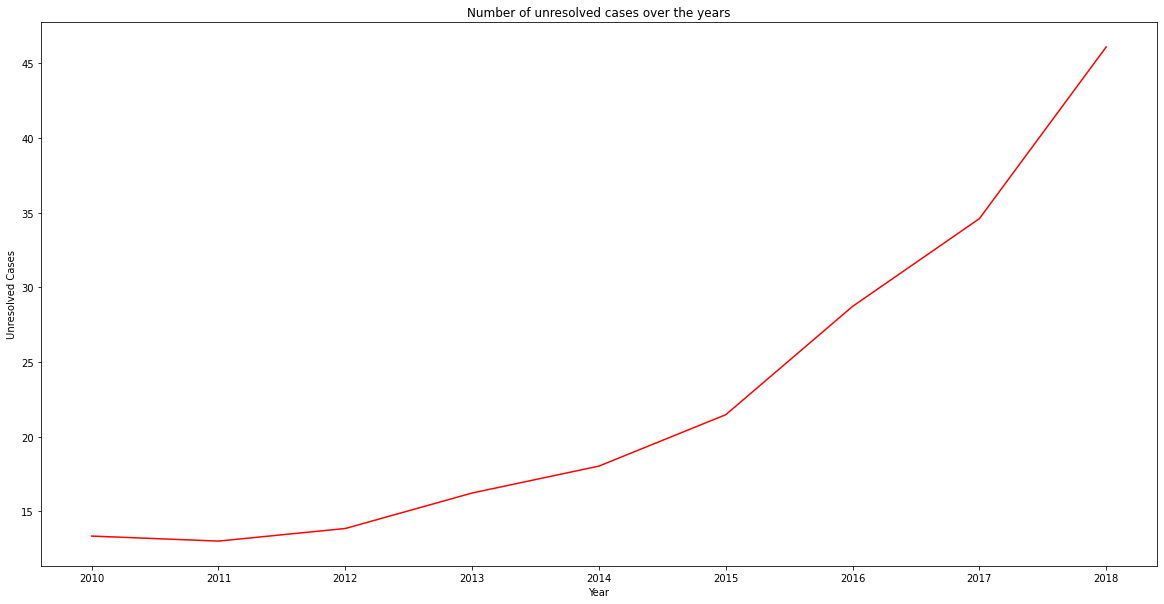

In [17]:
fig = plt.figure(figsize=(20, 10))
plt.plot(plt_ratio_unfinished_x, plt_ratio_unfinished_y, color='red')

plt.xlabel("Year")
plt.ylabel("Unresolved Cases")
plt.title("Number of unresolved cases over the years")
plt.show()


### _The above graph shows an exponential increase in the number of unfinished cases_ **per year**, _which does not even include backlog from the previous years. This is an indication of the load on the judicial system._


---

## Time taken for a judge to close a case over the years:


In [8]:
def calculate_days(a, b):
    # helper function to calculate the days between two dates

    date_object_1 = datetime.strptime(str(b), '%Y-%m-%d').date()
    date_object_2 = datetime.strptime(str(a), '%Y-%m-%d').date()
    ans = int((date_object_1 - date_object_2).days)
    if ans < 0:
        return 1
    else:
        return ans


### _The below cell accumulates the time taken between the date of filing and the date of decision for cases that have this data available, and stores the averages for each year in the average_times vector_


In [9]:
%% time
# average time to complete a decision, calculate using mean of (sum of means)
average_times = []

for case_year in case_years:

    average_time_acc = 0
    chunk_counter = 0
    cases_df = pd.read_csv(case_year, iterator=True, chunksize=100000)

    for case_df in cases_df:

        case_df = case_df[case_df["date_of_filing"].notna()]
        case_df = case_df[case_df["date_of_decision"].notna()]

        case_df["days_to_complete"] = case_df.apply(lambda row: calculate_days(row["date_of_filing"],row["date_of_decision"]), axis=1)
        # some datapoints have bad year values, they are ommitted
        case_df = case_df[(case_df["days_to_complete"] < 4745)]

        average_time_acc += case_df["days_to_complete"].mean()
        chunk_counter += 1
    average_times.append(average_time_acc/chunk_counter)


CPU times: user 19min 29s, sys: 1min 19s, total: 20min 48s
Wall time: 23min 13s


In [18]:

average_times = [1139.5600585084742,
                 942.2221557860486,
                 777.9814353481255,
                 596.5921784052974,
                 454.80066704704825,
                 361.36945968091135,
                 253.00268866891776,
                 154.9474819149497,
                 78.05243489645055]


In [11]:
plt_avg_time_x = ["2010", "2011", "2012", "2013",
                  "2014", "2015", "2016", "2017", "2018"]
plt_avg_time_y = average_times


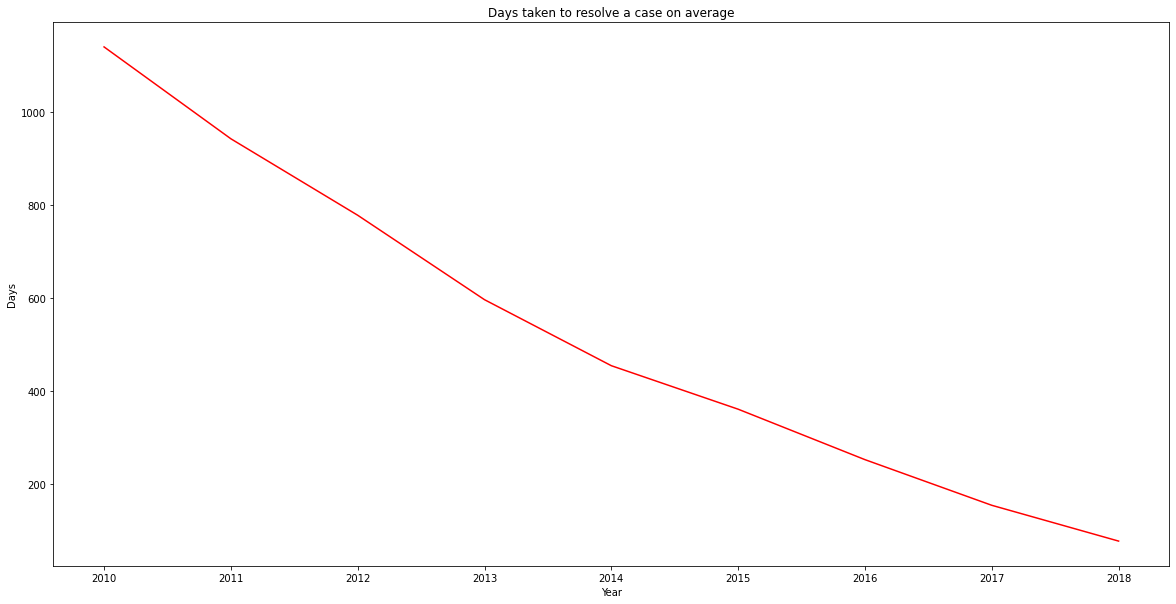

In [19]:
fig = plt.figure(figsize=(20, 10))
plt.plot(plt_avg_time_x, plt_avg_time_y, color='red',)

plt.xlabel("Year")
plt.ylabel("Days")
plt.title("Days taken to resolve a case on average")
plt.show()


### _The above plot shows that the time it takes for a judge to make a decision is decreasing every year. (note : data towards the end years 2017 and 2018 is skewed because of lack of end dates further from 2017 and 2018, but the general decreasing trend still stands). Despite this, the number of unfinished cases are exponentilly rising_

---
